In [819]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import radians, sin, cos, acos

In [890]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [820]:
ex_final = pd.read_csv('energy_withneighbourhoods.csv')

In [821]:
ex_final.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Parcel(s),Building Name,Building Address,Postal Code,Full.Address,Floor Area,Property Type - Self Selected,...,2011 Total GHG Emissions Intensity (kgCO2e/ft2),2011 Weather Normalized Site EUI (kBtu/ft2),2011 Weather Normalized Source EUI (kBtu/ft2),lat,long,Total Site Energy 2016,Total Site Energy 2015,Total Site Energy 2014,Total Site Energy 2013,neighbourhood
0,0,0,0,5584/001B,Apparel Triangle,20 APPAREL WAY,94124,0,34537,Non-Refrigerated Warehouse,...,0.0,0,0,37.740240,-122.402721,732184.4,777082.5,680378.9,763267.7,Apparel City
1,1,1,1,3957/002,350 Rhode Island - North,350 Rhode Island - North,94103,"350 Rhode Island North\nSAN FRANCISCO, CA 94103\n",127074,Other - Education,...,0.0,123.6,0,37.765388,-122.403103,12758229.6,13736699.4,13050499.8,11703515.4,Potrero Hill
2,2,2,2,5584/001A,Apparel Triangle,425-495 Barneveld Avenue,94124,0,34537,Non-Refrigerated Warehouse,...,0.0,0,0,NaN,NaN,1733757.4,1806285.1,1664683.4,1854636.9,Potrero Hill
3,3,3,3,5587/004A,2222 PALOU AVE,2222 PALOU AVE,94124,0,44311,Non-Refrigerated Warehouse,...,0.0,0,0,37.740549,-122.401790,1019153.0,646940.6,527300.9,491852.1,Apparel City
4,4,5,5,3741/035,2 Folsom,250 THE EMBARCADERO,94105,"250 THE\nSAN FRANCISCO, CA 94105\n",700079,Office,...,0.0,55.9,0,37.791775,-122.390360,37524234.4,38574352.9,37944281.8,38574352.9,Financial District


In [822]:
ex_final.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Parcel(s)',
       'Building Name', 'Building Address', 'Postal Code', 'Full.Address',
       'Floor Area', 'Property Type - Self Selected',
       ...
       '2011 Total GHG Emissions Intensity (kgCO2e/ft2)',
       '2011 Weather Normalized Site EUI (kBtu/ft2)',
       '2011 Weather Normalized Source EUI (kBtu/ft2)', 'lat', 'long',
       'Total Site Energy 2016', 'Total Site Energy 2015',
       'Total Site Energy 2014', 'Total Site Energy 2013', 'neighbourhood'],
      dtype='object', length=101)

In [823]:
data_df = ex_final[['Building Name','Postal Code','Floor Area', 'Property Type - Self Selected',
                    '2017 Site EUI (kBtu/ft2)','2016 Site EUI (kBtu/ft2)','2015 Site EUI (kBtu/ft2)',
                    '2014 Site EUI (kBtu/ft2)','2013 Site EUI (kBtu/ft2)','2012 Site EUI (kBtu/ft2)',
                   'neighbourhood','lat', 'long']]
                

In [824]:
#Dropping the null values for now
data_df = data_df.dropna()
def replaceComma(pos):
    return pos.replace(",","")

In [825]:
data_df.head()
len(data_df)

917

In [826]:
x = data_df[data_df['2012 Site EUI (kBtu/ft2)'] != 0]
x.head()
len(x)

500

In [827]:
df = x[x['2017 Site EUI (kBtu/ft2)'] != 0]
len(df)

337

In [829]:
df = df.reset_index(drop=True)
final_df = df.copy()
df.head()


,Building Name,Postal Code,Floor Area,Property Type - Self Selected,2017 Site EUI (kBtu/ft2),2016 Site EUI (kBtu/ft2),2015 Site EUI (kBtu/ft2),2014 Site EUI (kBtu/ft2),2013 Site EUI (kBtu/ft2),2012 Site EUI (kBtu/ft2),neighbourhood,lat,long
0,350 Rhode Island - North,94103,127074,Other - Education,76.8,100.4,108.1,102.7,92.1,94.9,Potrero Hill,37.765388,-122.403103
1,2 Folsom,94105,700079,Office,56.7,53.6,55.1,54.2,55.1,54.6,Financial District,37.791775,-122.390360
2,1 MISSION,94105,31740,Office,226.9,236.3,268.3,276.1,285.3,242.0,Financial District,37.793322,-122.392775
3,1 Harrison,94105,203456,Office,46.6,46.2,50.0,48.5,48.0,50.2,Rincon Hill,37.789141,-122.389039
4,633 Battery,94111,119099,Office,37.9,40.0,40.9,42.8,47.8,52.6,North Beach,37.797191,-122.400785


In [830]:
df.head()
#df.isnull()

,Building Name,Postal Code,Floor Area,Property Type - Self Selected,2017 Site EUI (kBtu/ft2),2016 Site EUI (kBtu/ft2),2015 Site EUI (kBtu/ft2),2014 Site EUI (kBtu/ft2),2013 Site EUI (kBtu/ft2),2012 Site EUI (kBtu/ft2),neighbourhood,lat,long
0,350 Rhode Island - North,94103,127074,Other - Education,76.8,100.4,108.1,102.7,92.1,94.9,Potrero Hill,37.765388,-122.403103
1,2 Folsom,94105,700079,Office,56.7,53.6,55.1,54.2,55.1,54.6,Financial District,37.791775,-122.390360
2,1 MISSION,94105,31740,Office,226.9,236.3,268.3,276.1,285.3,242.0,Financial District,37.793322,-122.392775
3,1 Harrison,94105,203456,Office,46.6,46.2,50.0,48.5,48.0,50.2,Rincon Hill,37.789141,-122.389039
4,633 Battery,94111,119099,Office,37.9,40.0,40.9,42.8,47.8,52.6,North Beach,37.797191,-122.400785


In [831]:
x = df[['lat','long','Floor Area','2016 Site EUI (kBtu/ft2)','2015 Site EUI (kBtu/ft2)','2014 Site EUI (kBtu/ft2)','2013 Site EUI (kBtu/ft2)','2012 Site EUI (kBtu/ft2)']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_m3ax_scaler.fit_transform(x)
df[['lat','long','Floor Area','2016 Site EUI (kBtu/ft2)','2015 Site EUI (kBtu/ft2)','2014 Site EUI (kBtu/ft2)','2013 Site EUI (kBtu/ft2)','2012 Site EUI (kBtu/ft2)']]= pd.DataFrame(x_scaled)


In [832]:
df.head()

,Building Name,Postal Code,Floor Area,Property Type - Self Selected,2017 Site EUI (kBtu/ft2),2016 Site EUI (kBtu/ft2),2015 Site EUI (kBtu/ft2),2014 Site EUI (kBtu/ft2),2013 Site EUI (kBtu/ft2),2012 Site EUI (kBtu/ft2),neighbourhood,lat,long
0,350 Rhode Island - North,94103,0.068929,Other - Education,76.8,0.132308,0.138585,0.135074,0.056528,0.150057,Potrero Hill,0.570279,0.861563
1,2 Folsom,94105,0.457521,Office,56.7,0.070264,0.070259,0.070468,0.033315,0.084539,Financial District,0.838799,0.964532
2,1 MISSION,94105,0.004277,Office,226.9,0.312475,0.345108,0.366058,0.177740,0.389205,Financial District,0.854538,0.945022
3,1 Harrison,94105,0.120729,Office,46.6,0.060453,0.063684,0.062875,0.028860,0.077386,Rincon Hill,0.811996,0.975209
4,633 Battery,94111,0.063521,Office,37.9,0.052234,0.051953,0.055282,0.028735,0.081288,North Beach,0.893914,0.880295


In [833]:
df.set_index('Building Name', inplace=True)

dummy_columns = ['Postal Code','Property Type - Self Selected', 'neighbourhood']
df = pd.get_dummies(df, columns=dummy_columns)

In [834]:
len(df.dropna())
df_2017 = df.copy()
df_2017.head()

,Floor Area,2017 Site EUI (kBtu/ft2),2016 Site EUI (kBtu/ft2),2015 Site EUI (kBtu/ft2),2014 Site EUI (kBtu/ft2),2013 Site EUI (kBtu/ft2),2012 Site EUI (kBtu/ft2),lat,long,Postal Code_94102,...,neighbourhood_Presidio Heights,neighbourhood_Presidio Terrace,neighbourhood_Produce Market,neighbourhood_Rincon Hill,neighbourhood_Showplace Square,neighbourhood_South Beach,neighbourhood_South of Market,neighbourhood_Telegraph Hill,neighbourhood_Tenderloin,neighbourhood_Union Street
Building Name,,,,,,,,,,,,,,,,,,,,,
350 Rhode Island - North,0.068929,76.8,0.132308,0.138585,0.135074,0.056528,0.150057,0.570279,0.861563,0,...,0,0,0,0,0,0,0,0,0,0
2 Folsom,0.457521,56.7,0.070264,0.070259,0.070468,0.033315,0.084539,0.838799,0.964532,0,...,0,0,0,0,0,0,0,0,0,0
1 MISSION,0.004277,226.9,0.312475,0.345108,0.366058,0.177740,0.389205,0.854538,0.945022,0,...,0,0,0,0,0,0,0,0,0,0
1 Harrison,0.120729,46.6,0.060453,0.063684,0.062875,0.028860,0.077386,0.811996,0.975209,0,...,0,0,0,1,0,0,0,0,0,0
633 Battery,0.063521,37.9,0.052234,0.051953,0.055282,0.028735,0.081288,0.893914,0.880295,0,...,0,0,0,0,0,0,0,0,0,0


In [835]:
def normalize(feature_name,df):
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    return (df[feature_name] - min_value) / (max_value - min_value)


values= df['2017 Site EUI (kBtu/ft2)']
drop_columns = ['2017 Site EUI (kBtu/ft2)']
df = df.drop(drop_columns, axis=1)

In [836]:
df.head()

,Floor Area,2016 Site EUI (kBtu/ft2),2015 Site EUI (kBtu/ft2),2014 Site EUI (kBtu/ft2),2013 Site EUI (kBtu/ft2),2012 Site EUI (kBtu/ft2),lat,long,Postal Code_94102,Postal Code_94103,...,neighbourhood_Presidio Heights,neighbourhood_Presidio Terrace,neighbourhood_Produce Market,neighbourhood_Rincon Hill,neighbourhood_Showplace Square,neighbourhood_South Beach,neighbourhood_South of Market,neighbourhood_Telegraph Hill,neighbourhood_Tenderloin,neighbourhood_Union Street
Building Name,,,,,,,,,,,,,,,,,,,,,
350 Rhode Island - North,0.068929,0.132308,0.138585,0.135074,0.056528,0.150057,0.570279,0.861563,0,1,...,0,0,0,0,0,0,0,0,0,0
2 Folsom,0.457521,0.070264,0.070259,0.070468,0.033315,0.084539,0.838799,0.964532,0,0,...,0,0,0,0,0,0,0,0,0,0
1 MISSION,0.004277,0.312475,0.345108,0.366058,0.177740,0.389205,0.854538,0.945022,0,0,...,0,0,0,0,0,0,0,0,0,0
1 Harrison,0.120729,0.060453,0.063684,0.062875,0.028860,0.077386,0.811996,0.975209,0,0,...,0,0,0,1,0,0,0,0,0,0
633 Battery,0.063521,0.052234,0.051953,0.055282,0.028735,0.081288,0.893914,0.880295,0,0,...,0,0,0,0,0,0,0,0,0,0


In [837]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df,values,test_size=0.3,random_state = 0)

In [838]:
Xtrain.shape,Ytrain.shape

((235, 102), (235,))

In [839]:
len(Ytest)

102

In [840]:
from sklearn.linear_model import LinearRegression

# lr = LinearRegression()
# lr.fit(Xtrain,Ytrain)
# lr_pred = lr.predict(Xtest)
# lr.score(Xtest,Ytest)

# print("mean_absolute_error: %.2f"
#       % mean_absolute_error(Ytest,lr_pred))
# # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % r2_score(Ytest,lr_pred))

# # Plot outputs
# plt.plot(range(len(Ytest)), Ytest,  color='black')
# plt.plot(range(len(Ytest)), lr_pred, color='blue')

# plt.xticks(())
# plt.yticks(())

# plt.show()

## Regression

In [841]:
from sklearn.linear_model import Ridge

rr = Ridge()
rr.fit(Xtrain,Ytrain)
rr_pred = rr.predict(Xtest)
rr.score(Xtest,Ytest)

0.92350986509626265

In [842]:
print("mean_absolute_error: %.2f"
      % mean_absolute_error(Ytest,rr_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Ytest,rr_pred))

mean_absolute_error: 10.56
Variance score: 0.92


In [843]:
##Cross Validation

from sklearn.model_selection import GridSearchCV

params={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
rdg_reg = Ridge()
clf = GridSearchCV(rdg_reg,params,cv=5,verbose = 1, scoring = 'neg_mean_absolute_error')
clf.fit(Xtrain,Ytrain)

clf.best_params_
#{'alpha': 4}

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.2s finished


{'alpha': 0.05}

In [844]:
rr = clf.best_estimator_
rr.fit(Xtrain,Ytrain)
rr_pred = rr.predict(Xtest)
rr.score(Xtest,Ytest)

0.88199354359347637

mean_absolute_error: 9.56
Variance score: 0.88


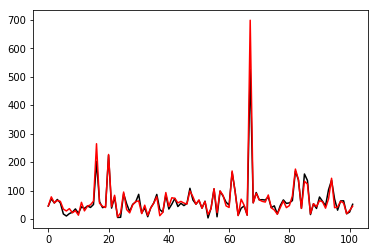

In [845]:
print("mean_absolute_error: %.2f"
      % mean_absolute_error(Ytest,rr_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Ytest,rr_pred))
plt.plot(range(len(Ytest)), Ytest,  color='black')
#plt.plot(range(len(Ytest)), lr_pred, color='blue')
plt.plot(range(len(Ytest)), rr_pred, color='red')

# plt.xticks(
# plt.yticks(())
plt.xlim()

plt.show()

In [874]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(Xtrain,Ytrain)
rf_pred = rf.predict(Xtest)
rf.score(Xtest,Ytest)

0.95698907954632151

mean_absolute_error: 7.71
Variance score: 0.96


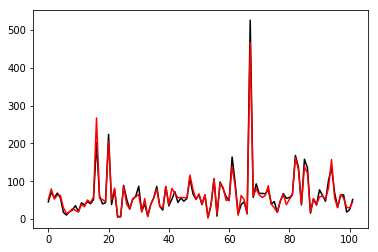

In [875]:
print("mean_absolute_error: %.2f"
      % mean_absolute_error(Ytest,rf_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Ytest,rf_pred))
plt.plot(range(len(Ytest)), Ytest,  color='black')
#plt.plot(range(len(Ytest)), lr_pred, color='blue')
plt.plot(range(len(Ytest)), rf_pred, color='red')

# plt.xticks(
# plt.yticks(())
plt.xlim()

plt.show()

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
rf_cv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring = 'neg_mean_absolute_error')
rf_cv.fit(Xtrain,Ytrain)

In [958]:
rf_cv.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=12, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [957]:
rf_best = rf_cv.best_estimator_
rf_best.fit(Xtrain,Ytrain)
rf_best_pred = rf_best.predict(Xtest)
rf_best.score(Xtest,Ytest)
print("mean_absolute_error: %.2f"
      % mean_absolute_error(Ytest,rf_best_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Ytest,rf_best_pred))

mean_absolute_error: 26.65
Variance score: 0.43


In [876]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool

output_file("2017.html")

source = ColumnDataSource(
        data=dict(
            x=range(len(Ytest)),
            y1=Ytest,
            y2 = rf_pred,
            desc=list(Ytest.index.values),
        )
    )

hover = HoverTool(
        tooltips=[
            #("index", "$index"),
            ("Energy Consumed:", "$y"),
            ("Building:", "@desc"),
        ]
    )

p = figure(plot_width=900, plot_height=500, tools=[hover,"save","box_zoom,reset,pan"],x_axis_label = "Buildings", y_axis_label = "Energy Consumption (kBtu/ft2)",
           title="The Forecasted Values Vs the Actual Energy Consumption for the year 2017")

p.line('x', 'y1',line_color = 'blue', source=source, legend="Actual Values")
p.circle('x', 'y1',line_color = 'blue', source=source, legend="Actual Values",alpha = 0.5,fill_color = 'blue')
p.line('x', 'y2',line_color = 'red', source=source,legend="Predicted Values")
p.circle('x', 'y2', line_color = 'red',source=source,legend="Predicted Values",alpha = 0.5,fill_color = 'red')
p.legend.click_policy="hide"
show(p)



ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: y [renderer: GlyphRenderer(id='a6f06dd2-97c2-456b-b20b-786fd12ca133', ...)]


In [846]:
df.head()


,Floor Area,2016 Site EUI (kBtu/ft2),2015 Site EUI (kBtu/ft2),2014 Site EUI (kBtu/ft2),2013 Site EUI (kBtu/ft2),2012 Site EUI (kBtu/ft2),lat,long,Postal Code_94102,Postal Code_94103,...,neighbourhood_Presidio Heights,neighbourhood_Presidio Terrace,neighbourhood_Produce Market,neighbourhood_Rincon Hill,neighbourhood_Showplace Square,neighbourhood_South Beach,neighbourhood_South of Market,neighbourhood_Telegraph Hill,neighbourhood_Tenderloin,neighbourhood_Union Street
Building Name,,,,,,,,,,,,,,,,,,,,,
350 Rhode Island - North,0.068929,0.132308,0.138585,0.135074,0.056528,0.150057,0.570279,0.861563,0,1,...,0,0,0,0,0,0,0,0,0,0
2 Folsom,0.457521,0.070264,0.070259,0.070468,0.033315,0.084539,0.838799,0.964532,0,0,...,0,0,0,0,0,0,0,0,0,0
1 MISSION,0.004277,0.312475,0.345108,0.366058,0.177740,0.389205,0.854538,0.945022,0,0,...,0,0,0,0,0,0,0,0,0,0
1 Harrison,0.120729,0.060453,0.063684,0.062875,0.028860,0.077386,0.811996,0.975209,0,0,...,0,0,0,1,0,0,0,0,0,0
633 Battery,0.063521,0.052234,0.051953,0.055282,0.028735,0.081288,0.893914,0.880295,0,0,...,0,0,0,0,0,0,0,0,0,0


### Forecasting

In [848]:
df_2017.head()

,Floor Area,2017 Site EUI (kBtu/ft2),2016 Site EUI (kBtu/ft2),2015 Site EUI (kBtu/ft2),2014 Site EUI (kBtu/ft2),2013 Site EUI (kBtu/ft2),2012 Site EUI (kBtu/ft2),lat,long,Postal Code_94102,...,neighbourhood_Presidio Heights,neighbourhood_Presidio Terrace,neighbourhood_Produce Market,neighbourhood_Rincon Hill,neighbourhood_Showplace Square,neighbourhood_South Beach,neighbourhood_South of Market,neighbourhood_Telegraph Hill,neighbourhood_Tenderloin,neighbourhood_Union Street
Building Name,,,,,,,,,,,,,,,,,,,,,
350 Rhode Island - North,0.068929,76.8,0.132308,0.138585,0.135074,0.056528,0.150057,0.570279,0.861563,0,...,0,0,0,0,0,0,0,0,0,0
2 Folsom,0.457521,56.7,0.070264,0.070259,0.070468,0.033315,0.084539,0.838799,0.964532,0,...,0,0,0,0,0,0,0,0,0,0
1 MISSION,0.004277,226.9,0.312475,0.345108,0.366058,0.177740,0.389205,0.854538,0.945022,0,...,0,0,0,0,0,0,0,0,0,0
1 Harrison,0.120729,46.6,0.060453,0.063684,0.062875,0.028860,0.077386,0.811996,0.975209,0,...,0,0,0,1,0,0,0,0,0,0
633 Battery,0.063521,37.9,0.052234,0.051953,0.055282,0.028735,0.081288,0.893914,0.880295,0,...,0,0,0,0,0,0,0,0,0,0


In [849]:
df_2017['2012 Site EUI (kBtu/ft2)'] = df_2017['2013 Site EUI (kBtu/ft2)']
df_2017['2013 Site EUI (kBtu/ft2)'] = df_2017['2014 Site EUI (kBtu/ft2)']
df_2017['2014 Site EUI (kBtu/ft2)'] = df_2017['2015 Site EUI (kBtu/ft2)']
df_2017['2015 Site EUI (kBtu/ft2)'] = df_2017['2016 Site EUI (kBtu/ft2)']
df_2017['2016 Site EUI (kBtu/ft2)'] = df_2017['2017 Site EUI (kBtu/ft2)']

In [860]:

df_2017.reset_index(inplace=False)
df_2017.head()

,index,Building Name,Floor Area,2017 Site EUI (kBtu/ft2),2016 Site EUI (kBtu/ft2),2015 Site EUI (kBtu/ft2),2014 Site EUI (kBtu/ft2),2013 Site EUI (kBtu/ft2),2012 Site EUI (kBtu/ft2),lat,...,neighbourhood_Presidio Heights,neighbourhood_Presidio Terrace,neighbourhood_Produce Market,neighbourhood_Rincon Hill,neighbourhood_Showplace Square,neighbourhood_South Beach,neighbourhood_South of Market,neighbourhood_Telegraph Hill,neighbourhood_Tenderloin,neighbourhood_Union Street
0,0,350 Rhode Island - North,0.068929,76.8,76.8,0.132308,0.138585,0.135074,0.056528,0.570279,...,0,0,0,0,0,0,0,0,0,0
1,1,2 Folsom,0.457521,56.7,56.7,0.070264,0.070259,0.070468,0.033315,0.838799,...,0,0,0,0,0,0,0,0,0,0
2,2,1 MISSION,0.004277,226.9,226.9,0.312475,0.345108,0.366058,0.177740,0.854538,...,0,0,0,0,0,0,0,0,0,0
3,3,1 Harrison,0.120729,46.6,46.6,0.060453,0.063684,0.062875,0.028860,0.811996,...,0,0,0,1,0,0,0,0,0,0
4,4,633 Battery,0.063521,37.9,37.9,0.052234,0.051953,0.055282,0.028735,0.893914,...,0,0,0,0,0,0,0,0,0,0


In [861]:
x = df_2017[['2016 Site EUI (kBtu/ft2)']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_2017[['2016 Site EUI (kBtu/ft2)']]= pd.DataFrame(x_scaled)

df_2017.head()


,index,Building Name,Floor Area,2017 Site EUI (kBtu/ft2),2016 Site EUI (kBtu/ft2),2015 Site EUI (kBtu/ft2),2014 Site EUI (kBtu/ft2),2013 Site EUI (kBtu/ft2),2012 Site EUI (kBtu/ft2),lat,...,neighbourhood_Presidio Heights,neighbourhood_Presidio Terrace,neighbourhood_Produce Market,neighbourhood_Rincon Hill,neighbourhood_Showplace Square,neighbourhood_South Beach,neighbourhood_South of Market,neighbourhood_Telegraph Hill,neighbourhood_Tenderloin,neighbourhood_Union Street
0,0,350 Rhode Island - North,0.068929,76.8,0.097021,0.132308,0.138585,0.135074,0.056528,0.570279,...,0,0,0,0,0,0,0,0,0,0
1,1,2 Folsom,0.457521,56.7,0.071429,0.070264,0.070259,0.070468,0.033315,0.838799,...,0,0,0,0,0,0,0,0,0,0
2,2,1 MISSION,0.004277,226.9,0.288133,0.312475,0.345108,0.366058,0.177740,0.854538,...,0,0,0,0,0,0,0,0,0,0
3,3,1 Harrison,0.120729,46.6,0.058569,0.060453,0.063684,0.062875,0.028860,0.811996,...,0,0,0,1,0,0,0,0,0,0
4,4,633 Battery,0.063521,37.9,0.047492,0.052234,0.051953,0.055282,0.028735,0.893914,...,0,0,0,0,0,0,0,0,0,0


In [862]:
df_2017.set_index('Building Name', inplace=True)

#dummy_columns = ['Postal Code','Property Type - Self Selected', 'neighbourhood']
#df_2017 = pd.get_dummies(df, columns=dummy_columns)

In [863]:
df_2017.head()

,index,Floor Area,2017 Site EUI (kBtu/ft2),2016 Site EUI (kBtu/ft2),2015 Site EUI (kBtu/ft2),2014 Site EUI (kBtu/ft2),2013 Site EUI (kBtu/ft2),2012 Site EUI (kBtu/ft2),lat,long,...,neighbourhood_Presidio Heights,neighbourhood_Presidio Terrace,neighbourhood_Produce Market,neighbourhood_Rincon Hill,neighbourhood_Showplace Square,neighbourhood_South Beach,neighbourhood_South of Market,neighbourhood_Telegraph Hill,neighbourhood_Tenderloin,neighbourhood_Union Street
Building Name,,,,,,,,,,,,,,,,,,,,,
350 Rhode Island - North,0,0.068929,76.8,0.097021,0.132308,0.138585,0.135074,0.056528,0.570279,0.861563,...,0,0,0,0,0,0,0,0,0,0
2 Folsom,1,0.457521,56.7,0.071429,0.070264,0.070259,0.070468,0.033315,0.838799,0.964532,...,0,0,0,0,0,0,0,0,0,0
1 MISSION,2,0.004277,226.9,0.288133,0.312475,0.345108,0.366058,0.177740,0.854538,0.945022,...,0,0,0,0,0,0,0,0,0,0
1 Harrison,3,0.120729,46.6,0.058569,0.060453,0.063684,0.062875,0.028860,0.811996,0.975209,...,0,0,0,1,0,0,0,0,0,0
633 Battery,4,0.063521,37.9,0.047492,0.052234,0.051953,0.055282,0.028735,0.893914,0.880295,...,0,0,0,0,0,0,0,0,0,0


In [864]:
drop_columns = ['2017 Site EUI (kBtu/ft2)','index']
df_2017 = df_2017.drop(drop_columns, axis=1)

In [865]:
df_2017.head()

,Floor Area,2016 Site EUI (kBtu/ft2),2015 Site EUI (kBtu/ft2),2014 Site EUI (kBtu/ft2),2013 Site EUI (kBtu/ft2),2012 Site EUI (kBtu/ft2),lat,long,Postal Code_94102,Postal Code_94103,...,neighbourhood_Presidio Heights,neighbourhood_Presidio Terrace,neighbourhood_Produce Market,neighbourhood_Rincon Hill,neighbourhood_Showplace Square,neighbourhood_South Beach,neighbourhood_South of Market,neighbourhood_Telegraph Hill,neighbourhood_Tenderloin,neighbourhood_Union Street
Building Name,,,,,,,,,,,,,,,,,,,,,
350 Rhode Island - North,0.068929,0.097021,0.132308,0.138585,0.135074,0.056528,0.570279,0.861563,0,1,...,0,0,0,0,0,0,0,0,0,0
2 Folsom,0.457521,0.071429,0.070264,0.070259,0.070468,0.033315,0.838799,0.964532,0,0,...,0,0,0,0,0,0,0,0,0,0
1 MISSION,0.004277,0.288133,0.312475,0.345108,0.366058,0.177740,0.854538,0.945022,0,0,...,0,0,0,0,0,0,0,0,0,0
1 Harrison,0.120729,0.058569,0.060453,0.063684,0.062875,0.028860,0.811996,0.975209,0,0,...,0,0,0,1,0,0,0,0,0,0
633 Battery,0.063521,0.047492,0.052234,0.051953,0.055282,0.028735,0.893914,0.880295,0,0,...,0,0,0,0,0,0,0,0,0,0


In [877]:
pred_2018 = rf.predict(df_2017)
#list(pred_2018)

In [868]:
predicted_df = pd.DataFrame()
predicted_df['Buildings'] = list(df_2017.index.values)

In [869]:
predicted_df['2012 Site EUI (kBtu/ft2)'] = final_df['2012 Site EUI (kBtu/ft2)']
predicted_df['2013 Site EUI (kBtu/ft2)'] = final_df['2013 Site EUI (kBtu/ft2)']
predicted_df['2014 Site EUI (kBtu/ft2)'] = final_df['2014 Site EUI (kBtu/ft2)']
predicted_df['2015 Site EUI (kBtu/ft2)'] = final_df['2015 Site EUI (kBtu/ft2)']
predicted_df['2016 Site EUI (kBtu/ft2)'] = final_df['2016 Site EUI (kBtu/ft2)']
predicted_df['2017 Site EUI (kBtu/ft2)'] = final_df['2017 Site EUI (kBtu/ft2)']

In [911]:
predicted_df['Floor Area'] = final_df['Floor Area']
predicted_df['Property Type - Self Selected'] = final_df['Property Type - Self Selected']
predicted_df['lat'] = final_df['lat']
predicted_df['long'] = final_df['long']
predicted_df['neighbourhood'] = final_df['neighbourhood']

In [912]:
predicted_df['Predicted_2018 Site EUI (kBtu/ft2)'] = list(pred_2018)

In [913]:
len(predicted_df)

337

In [914]:
predicted_df.head()

,Buildings,2012 Site EUI (kBtu/ft2),2013 Site EUI (kBtu/ft2),2014 Site EUI (kBtu/ft2),2015 Site EUI (kBtu/ft2),2016 Site EUI (kBtu/ft2),2017 Site EUI (kBtu/ft2),Predicted_2018 Site EUI (kBtu/ft2),Floor Area,Property Type - Self Selected,lat,long,Floor Area Bin,neighbourhood
0,350 Rhode Island - North,94.9,92.1,102.7,108.1,100.4,76.8,92.51,127074,Other - Education,37.765388,-122.403103,100-200,Potrero Hill
1,2 Folsom,54.6,55.1,54.2,55.1,53.6,56.7,60.81,700079,Office,37.791775,-122.390360,Above 400,Financial District
2,1 MISSION,242.0,285.3,276.1,268.3,236.3,226.9,258.34,31740,Office,37.793322,-122.392775,25-50,Financial District
3,1 Harrison,50.2,48.0,48.5,50.0,46.2,46.6,47.29,203456,Office,37.789141,-122.389039,200-400,Rincon Hill
4,633 Battery,52.6,47.8,42.8,40.9,40.0,37.9,37.56,119099,Office,37.797191,-122.400785,100-200,North Beach


In [881]:
predicted_df.to_csv('predicted_2018_rf.csv', index=False)

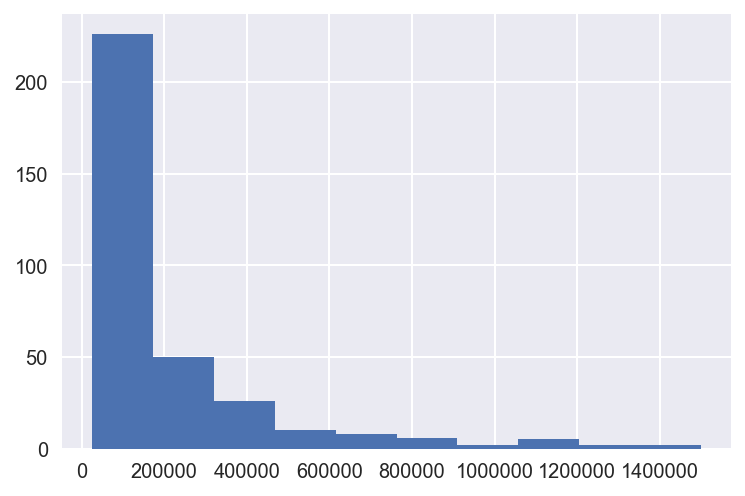

In [897]:
predicted_df['Floor Area'].hist()

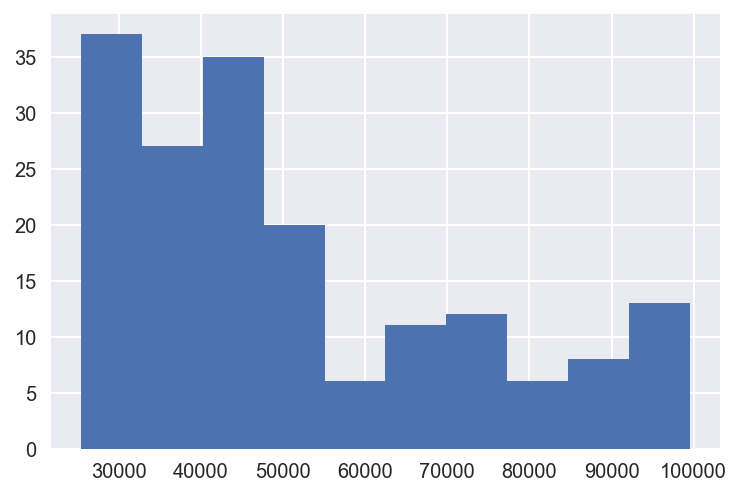

In [896]:
predicted_df[predicted_df['Floor Area'] < 100000]['Floor Area'].hist()

In [899]:
##Binning the Area
predicted_df['Floor Area Bin'] = ''
for i,row in enumerate(predicted_df['Floor Area']):
    if row >= 10000 and row <= 25000:
        predicted_df.loc[i,'Floor Area Bin'] = '10-25'
    elif row >= 20000 and row <= 50000:
        predicted_df.loc[i,'Floor Area Bin'] = '25-50'
    elif row >= 50000 and row <= 75000:
        predicted_df.loc[i,'Floor Area Bin'] = '50-75'
    elif row >= 75000 and row <= 100000:
        predicted_df.loc[i,'Floor Area Bin'] = '75-100'
    elif row >= 100000 and row <= 200000:
        predicted_df.loc[i,'Floor Area Bin'] = '100-200'
    elif row >= 200000 and row <= 400000:
            predicted_df.loc[i,'Floor Area Bin'] = '200-400'
    elif row >= 400000:
        predicted_df.loc[i,'Floor Area Bin'] = 'Above 400'

In [926]:
#predicted_df.groupby(['Floor Area Bin','Property Type - Self Selected','neighbourhood'], as_index=False)['Predicted_2018 Site EUI (kBtu/ft2)','lat','long'].mean()


In [918]:
x.to_csv('predictiveModel_rf.csv', index=False)

In [949]:
import folium

SF_COORDINATES = (37.76, -122.45)
area = "25-50"
propertyType = "Office"
energy = []
lat = []
long = []
e = 0
la = 0
lo = 0
map_osm = folium.Map(location=SF_COORDINATES, zoom_start=13)
for ar,prop,nhood,energyC,lati,longi in zip(x['Floor Area Bin'],
                                  x['Property Type - Self Selected'],x['neighbourhood'],
                                  x['Predicted_2018 Site EUI (kBtu/ft2)'],x['lat'],x['long']):
    if ar == area and prop == propertyType:
        energy.append(energyC)
        lat.append(lati)
        long.append(longi)

        popup = folium.Popup("Neighbourhood: "+nhood+" Energy Forecast for the year 2018(kBtu/ft2): "+str(round(energyC)), parse_html=True)
        folium.Marker(location=[lati, longi],
                                popup = popup).add_to(map_osm)
map_osm